In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import os

In [11]:
pic_save_path = 'pic_save'
if not os.path.exists(pic_save_path):
    os.mkdir(pic_save_path)
else:
    pass

In [12]:
model_difference = torch.load('model_save/model_difference.pth').cpu()
model_grad = torch.load('model_save/model_grad.pth').cpu()

/home/caliber/anaconda3/envs/pyt-gpu/lib/python3.7/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'model.NeuralNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [13]:
x = torch.arange(-2.2, 2.2, 0.01).view(-1, 1)
x_np = x.numpy()
a, b, sigma = 0.3, 0.5, 0.5
p = lambda x: np.exp((2*a*x**2 - b*x**4) / (2*(sigma**2)))
result = integrate.quad(p, -2.2, 2.2)[0]
result = integrate.quad(p, -2.2, 2.2)[0]

In [14]:
y_nn_difference = model_difference(x)
y_nn_grad = model_grad(x)
y_real = p(x_np) / result

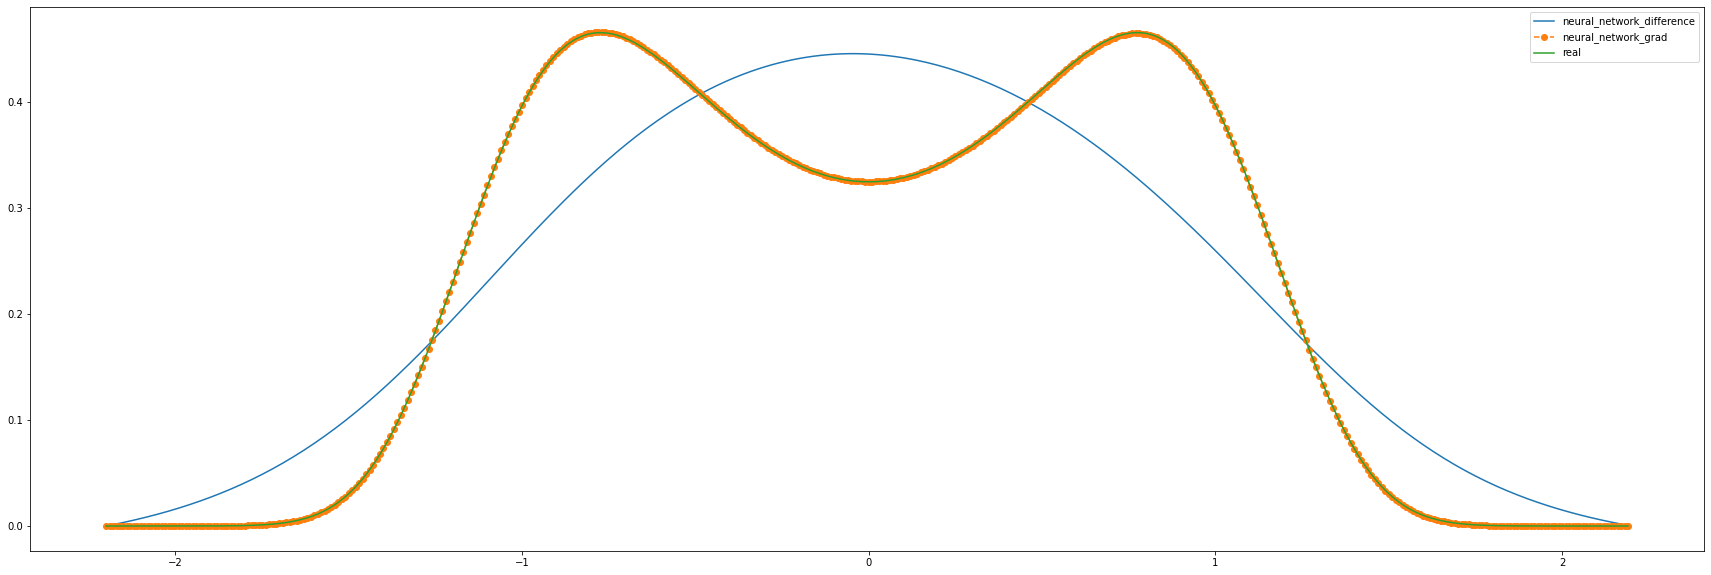

In [24]:
plt.figure(figsize=(30, 10))
plt.plot(x_np, y_nn_difference.detach().numpy(), label='neural_network_difference')
plt.plot(x_np, y_nn_grad.detach().numpy(), label='neural_network_grad', marker='o', linestyle='dashed')
plt.plot(x_np, y_real, label = 'real')
plt.legend()
plt.savefig('pic_save/res.png')